<a href="https://colab.research.google.com/github/Axlbenja/MiamiDadeCounty_EmployeePay_2025/blob/main/MiamiDadeCounty_EmployeePay_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, OneHotEncoder, OrdinalEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Axlbenja/MiamiDadeCounty_EmployeePay_2025/main/MiamiDadeCounty_EmployeePay_2025.csv', sep=',')

In [4]:
df.head()


,LastName,FirstName,MiddleInitial,Title,DeptName,AnnualSalary,GrossPayLastPaycheck,GrossYTD,ObjectId
0,LUC,AUNDREA,S,WASTE ENFORCEMENT OFFICER 1,SOLID WASTE MANAGEMENT,81592.186,9359.04,9359.04,1
1,LUE,KEISHA,RENEE,SHARED SERVICES SPECIALIST,HUMAN RESOURCES,56423.161,2756.12,2756.12,2
2,LUO,SEI,Y,SECRETARY,POLICE,40767.761,1640.86,1640.86,3
3,LYS,JACQUES,E,DTPW SERVICE SPECIALIST 2,TRANSPORTATION & PUBLIC WORKS,87534.450,3410.16,3410.16,4
4,MAS,JOSE,R,RER PERMIT & PLANS REP,REGULATORY & ECONOMIC RESOURCE,59237.468,2321.84,2321.84,5


In [5]:
print(df.columns)

Index(['LastName', 'FirstName', 'MiddleInitial', 'Title', 'DeptName',
       'AnnualSalary', 'GrossPayLastPaycheck', 'GrossYTD', 'ObjectId'],
      dtype='object')


# Tukey Method of Removing Outliers

In [6]:
df['AnnualSalary']

,AnnualSalary
0,81592.186
1,56423.161
2,40767.761
3,87534.450
4,59237.468
...,...
30075,24411.309
30076,68955.996
30077,35131.980
30078,133535.101


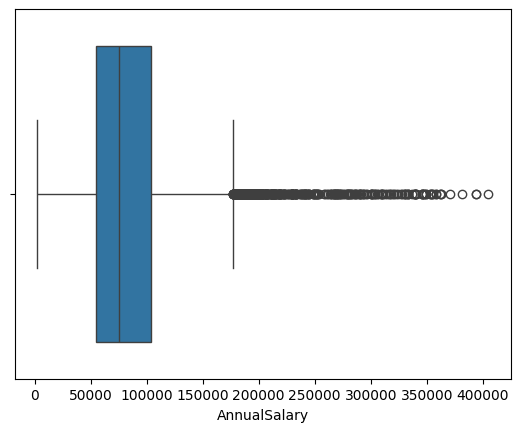

In [7]:
sns.boxplot(x = df['AnnualSalary'])
plt.show()

<ipython-input-8-5d05606cf536>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AnnualSalary'], bins = 15, kde=True)


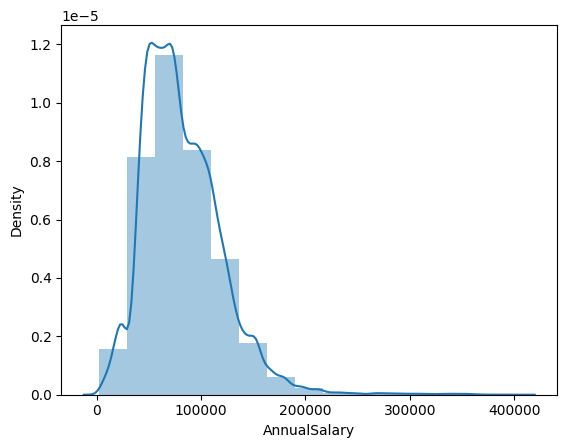

In [8]:
sns.distplot(df['AnnualSalary'], bins = 15, kde=True)
plt.show()

In [9]:
df[['AnnualSalary']].describe()

,AnnualSalary
count,30080.000000
mean,82348.446577
std,38386.282757
min,2340.000000
25%,54923.809000
50%,75423.226000
75%,103789.099000
max,405012.307000


In [10]:
df['AnnualSalary'].quantile(0.25)

54923.809

In [11]:
df['AnnualSalary'].quantile(0.75)

103789.099

In [12]:
Q1 = df['AnnualSalary'].quantile(0.25)
Q3 = df['AnnualSalary'].quantile(0.75)
IQR = Q3 - Q1
IQR

48865.29

In [13]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

In [14]:
lower_lim

-18374.125999999997

In [15]:
upper_lim

177087.03399999999

In [16]:
outliers_15_low = df[df['AnnualSalary'] < lower_lim]
outliers_15_low['AnnualSalary']

,AnnualSalary


In [17]:
outliers_15_up = df[df['AnnualSalary'] > upper_lim]
outliers_15_up['AnnualSalary']

,AnnualSalary
9,194999.561
33,189109.371
41,180482.647
62,240643.665
81,353426.580
...,...
29718,218122.737
29791,269933.300
29839,216636.714
29899,239588.960


In [18]:
len(df['AnnualSalary']) - (len(outliers_15_low) + len(outliers_15_up))

29511

In [19]:
outliers = df[(df['AnnualSalary'] < lower_lim) | (df['AnnualSalary'] > upper_lim)]
outliers['AnnualSalary']

,AnnualSalary
9,194999.561
33,189109.371
41,180482.647
62,240643.665
81,353426.580
...,...
29718,218122.737
29791,269933.300
29839,216636.714
29899,239588.960


In [20]:
df = df[~((df['AnnualSalary'] < lower_lim) | (df['AnnualSalary'] > upper_lim))]

In [21]:
df

,LastName,FirstName,MiddleInitial,Title,DeptName,AnnualSalary,GrossPayLastPaycheck,GrossYTD,ObjectId
0,LUC,AUNDREA,S,WASTE ENFORCEMENT OFFICER 1,SOLID WASTE MANAGEMENT,81592.186,9359.04,9359.04,1
1,LUE,KEISHA,RENEE,SHARED SERVICES SPECIALIST,HUMAN RESOURCES,56423.161,2756.12,2756.12,2
2,LUO,SEI,Y,SECRETARY,POLICE,40767.761,1640.86,1640.86,3
3,LYS,JACQUES,E,DTPW SERVICE SPECIALIST 2,TRANSPORTATION & PUBLIC WORKS,87534.450,3410.16,3410.16,4
4,MAS,JOSE,R,RER PERMIT & PLANS REP,REGULATORY & ECONOMIC RESOURCE,59237.468,2321.84,2321.84,5
...,...,...,...,...,...,...,...,...,...
30075,LORIE MARTINEZ PINILLOS,ALEXEI,ANTONIO,GOLF SERVICE ATTENDANT,"PARKS, RECREATION & OPEN SPCS",24411.309,238.70,4013.98,30076
30076,PANAITOV SILVA SANTIAGO,THIAGO,NaN,POLICE OFFICER,POLICE,68955.996,3841.06,3841.06,30077
30077,DEL VALLE ALVAREZ-COLINA,ENMAIBET,NaN,PROPERTY EXEMPTIONS CLERK,OFFICE OF THE PROPRTY APPRAISR,35131.980,1394.69,1394.69,30078
30078,GONZALEZ LOPEZ DE GAMARRA,JUAN ANTONIO,NaN,JA COMP SERVICES MANAGER,ADM OFFICE OF THE COURT,133535.101,7716.61,7716.61,30079


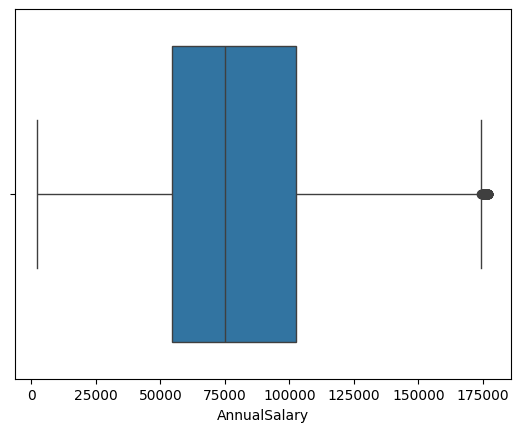

In [22]:
sns.boxplot(x=df['AnnualSalary'])
plt.show()

# Winsorize Method of Identifying and Removing Outliers

In [23]:
print(df.head())

  LastName FirstName MiddleInitial                        Title  \
0      LUC   AUNDREA             S  WASTE ENFORCEMENT OFFICER 1   
1      LUE    KEISHA         RENEE   SHARED SERVICES SPECIALIST   
2      LUO       SEI             Y                    SECRETARY   
3      LYS   JACQUES             E    DTPW SERVICE SPECIALIST 2   
4      MAS      JOSE             R       RER PERMIT & PLANS REP   

                         DeptName  AnnualSalary  GrossPayLastPaycheck  \
0          SOLID WASTE MANAGEMENT     81592.186               9359.04   
1                 HUMAN RESOURCES     56423.161               2756.12   
2                          POLICE     40767.761               1640.86   
3   TRANSPORTATION & PUBLIC WORKS     87534.450               3410.16   
4  REGULATORY & ECONOMIC RESOURCE     59237.468               2321.84   

   GrossYTD  ObjectId  
0   9359.04         1  
1   2756.12         2  
2   1640.86         3  
3   3410.16         4  
4   2321.84         5  


In [24]:
def plot_data(df, column, title_suffix, column_suffix=None):
    """
    Plot boxplot and histogram for given column in DataFrame.

    Parameters:
    - df: DataFrame containing the data
    - column: Name of the column to plot
    - title_suffix: Suffix for the title (e.g., 'Original', 'Winsorized')
    - column_suffix: Suffix to append to column name if needed (e.g., '_Winsorized')
    """
    col_name = f"{column}{column_suffix}" if column_suffix else column

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col_name])
    plt.title(f'Box Plot of {title_suffix} {column}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df[col_name], bins=10, kde=False)
    plt.title(f'Histogram of {title_suffix} {column}')
    plt.xlabel(f'{col_name}')
    plt.ylabel('Frequency')
    plt.show()


Summary Statistics for Original AnnualSalary:
count     29511.000000
mean      79674.874016
std       32801.061562
min        2340.000000
25%       54482.461500
50%       74885.692000
75%      102446.091000
max      177052.542000
Name: AnnualSalary, dtype: float64


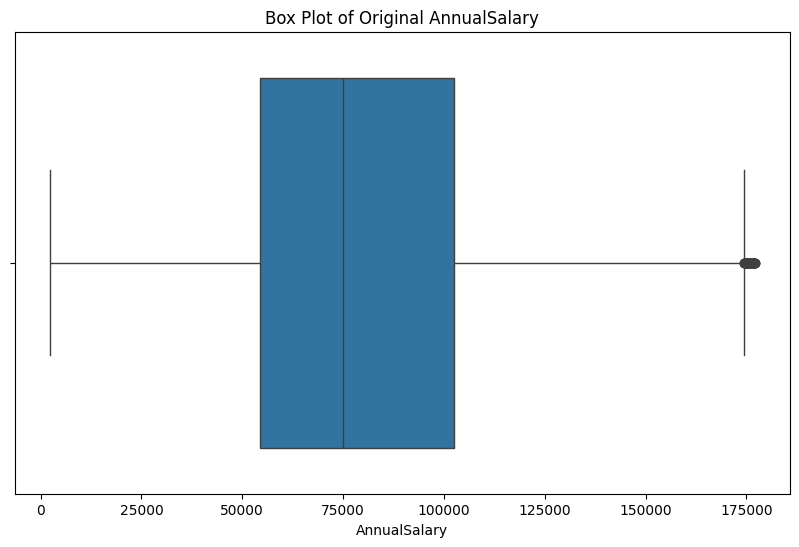

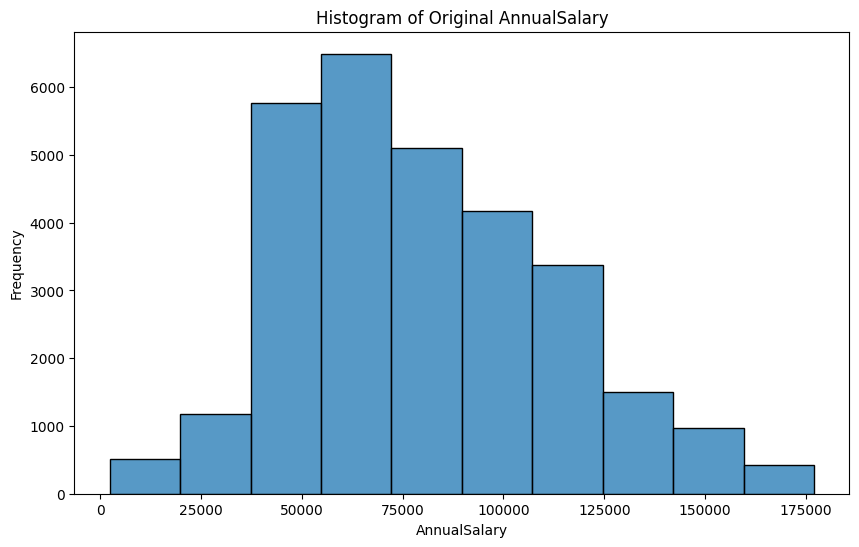


Summary Statistics for Original GrossPayLastPaycheck:
count    29511.000000
mean      3759.369628
std       2140.657662
min          0.010000
25%       2385.670000
50%       3439.890000
75%       4735.490000
max      77566.740000
Name: GrossPayLastPaycheck, dtype: float64


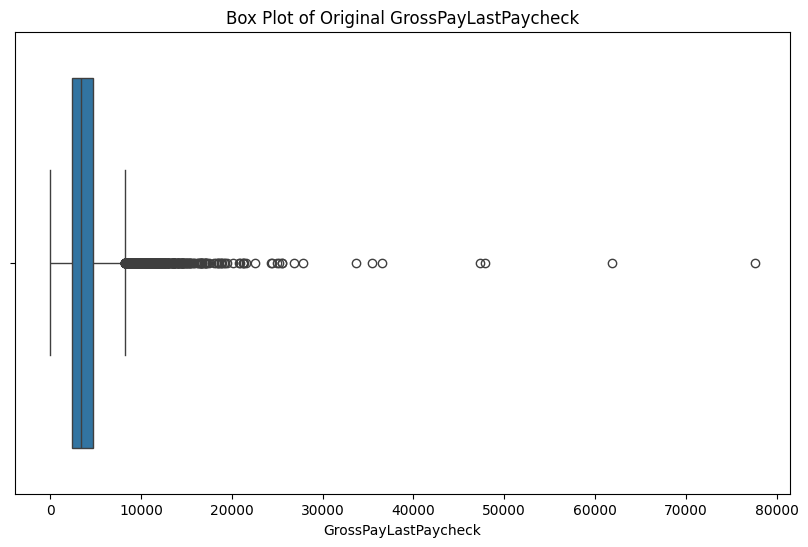

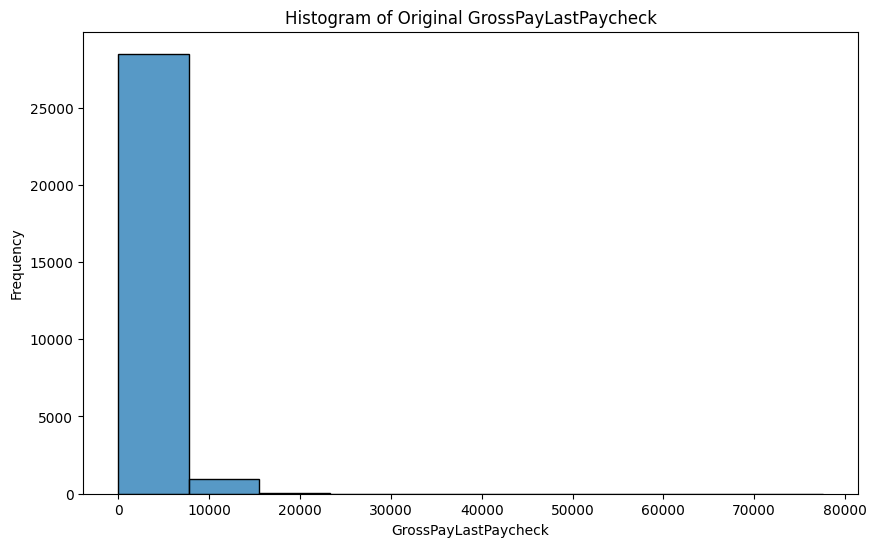


Summary Statistics for Original GrossYTD:
count     29511.000000
mean       3885.567743
std        2957.388059
min           0.010000
25%        2422.140000
50%        3486.320000
75%        4780.730000
max      159571.930000
Name: GrossYTD, dtype: float64


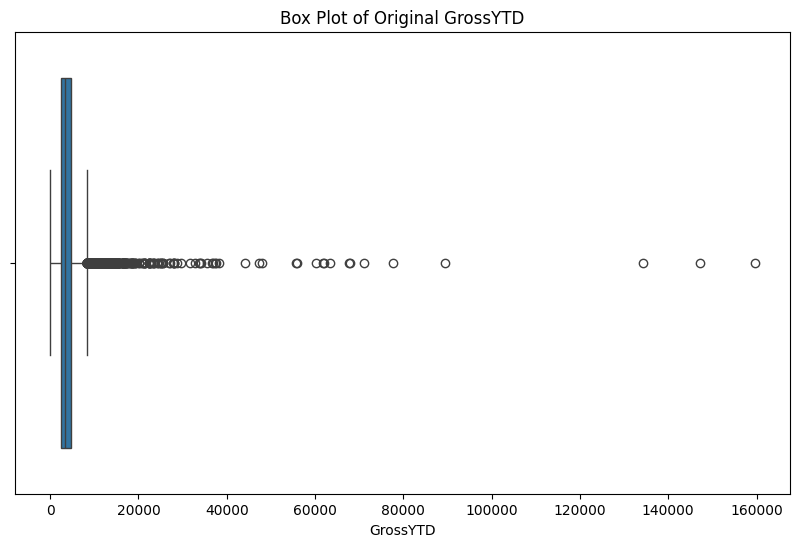

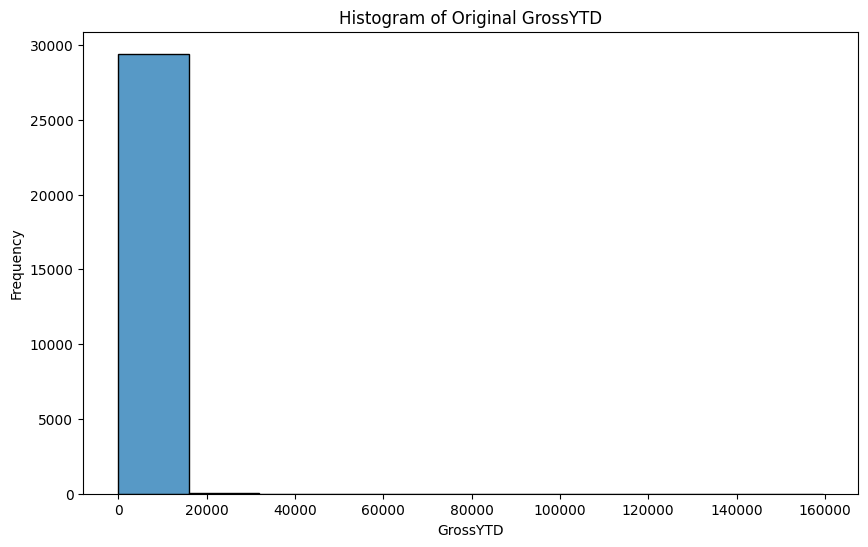

In [25]:
for col in ['AnnualSalary', 'GrossPayLastPaycheck', 'GrossYTD']:
    print(f"\nSummary Statistics for Original {col}:")
    print(df[col].describe())
    plot_data(df, col, title_suffix="Original")

In [26]:
def winsorize_and_plot(df, column, limits=[0.01, 0.01]):
    """
    Winsorize a column and plot the results.

    Parameters:
    - df: DataFrame containing the data
    - column: Name of the column to winsorize
    - limits: Tuple of (lower_limit, upper_limit) for Winsorizing
    """
    try:
        df[f"{column}_Winsorized"] = winsorize(df[column], limits=limits)

        print(f"\nSummary Statistics After Winsorizing {column}:")
        print(df[f"{column}_Winsorized"].describe())
        print(f"\nFirst Few Rows of Winsorized {column}:")
        print(df[f"{column}_Winsorized"].head())

        plot_data(df, column, title_suffix="Winsorized", column_suffix="_Winsorized")
    except KeyError:
        print(f"Error: Column '{column}' not found in DataFrame")
    except Exception as e:
        print(f"An error occurred while winsorizing {column}: {str(e)}")


Summary Statistics After Winsorizing AnnualSalary:
count     29511.000000
mean      79665.874077
std       32550.039437
min       16550.040000
25%       54482.461500
50%       74885.692000
75%      102446.091000
max      163847.378000
Name: AnnualSalary_Winsorized, dtype: float64

First Few Rows of Winsorized AnnualSalary:
0    81592.186
1    56423.161
2    40767.761
3    87534.450
4    59237.468
Name: AnnualSalary_Winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


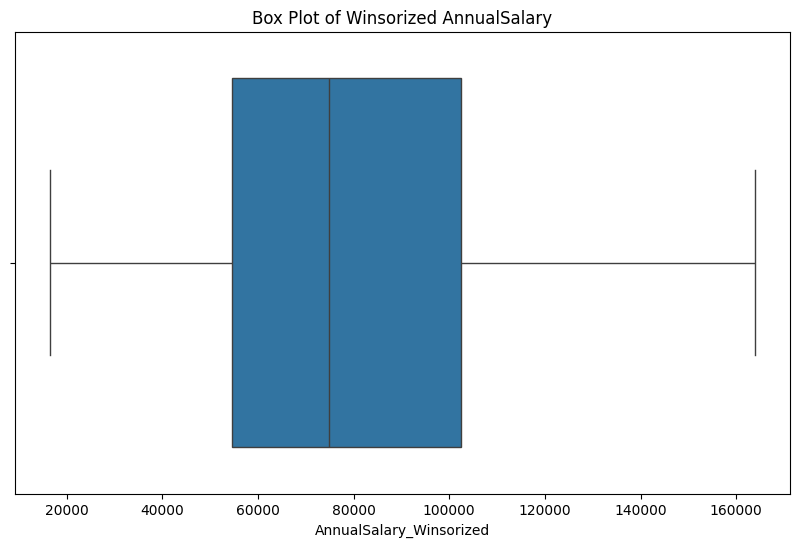

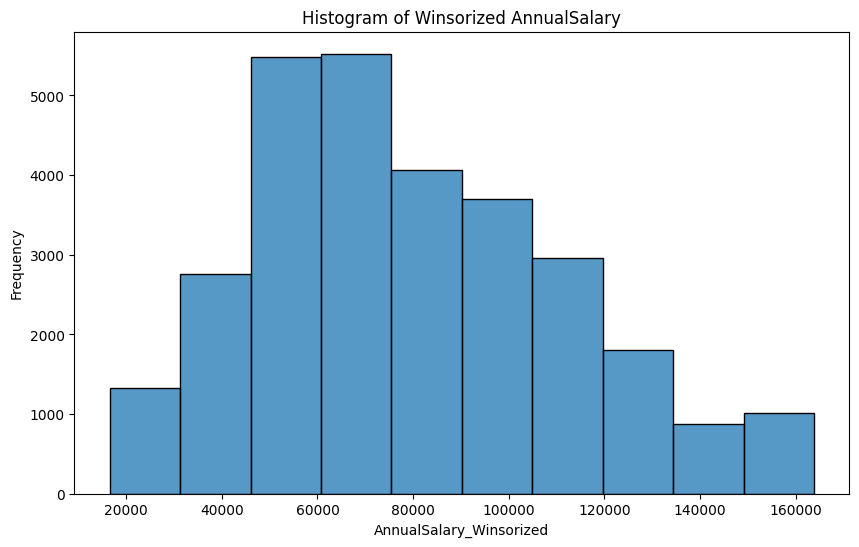


Summary Statistics After Winsorizing GrossPayLastPaycheck:
count    29511.000000
mean      3724.905377
std       1870.642407
min        407.390000
25%       2385.670000
50%       3439.890000
75%       4735.490000
max      10567.410000
Name: GrossPayLastPaycheck_Winsorized, dtype: float64

First Few Rows of Winsorized GrossPayLastPaycheck:
0    9359.04
1    2756.12
2    1640.86
3    3410.16
4    2321.84
Name: GrossPayLastPaycheck_Winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


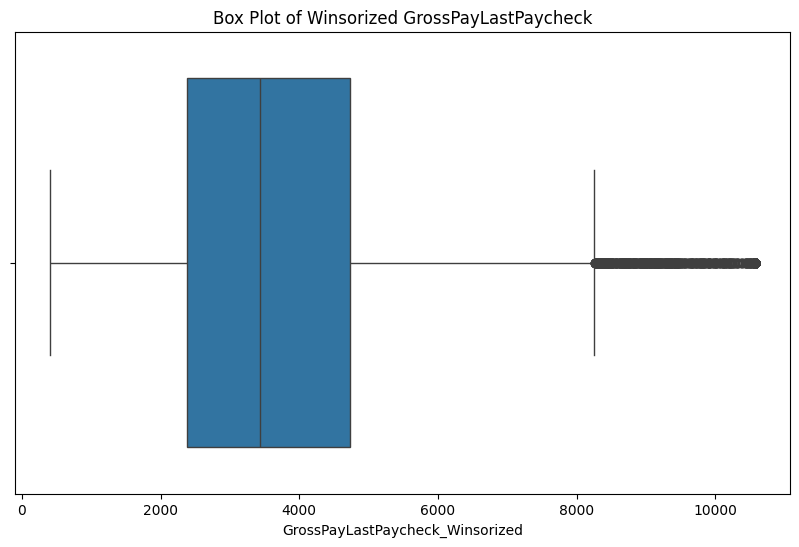

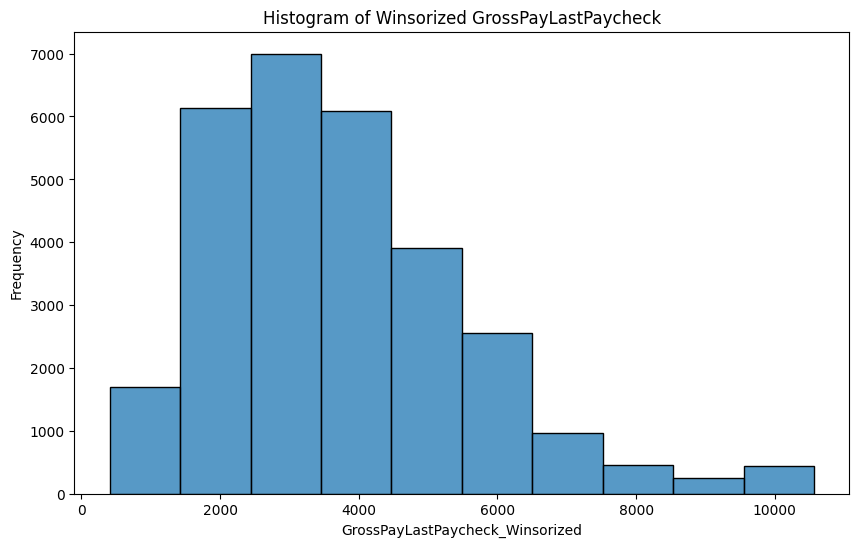


Summary Statistics After Winsorizing GrossYTD:
count    29511.000000
mean      3809.924653
std       1968.369163
min        578.550000
25%       2422.140000
50%       3486.320000
75%       4780.730000
max      11691.770000
Name: GrossYTD_Winsorized, dtype: float64

First Few Rows of Winsorized GrossYTD:
0    9359.04
1    2756.12
2    1640.86
3    3410.16
4    2321.84
Name: GrossYTD_Winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


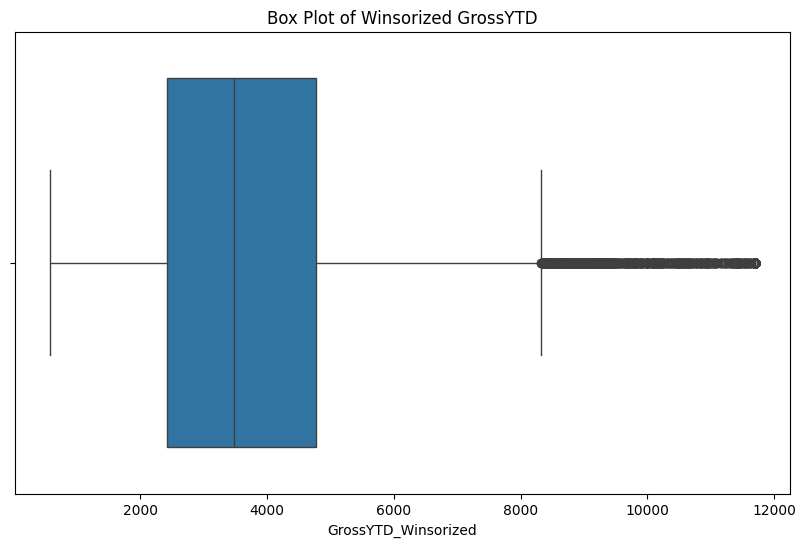

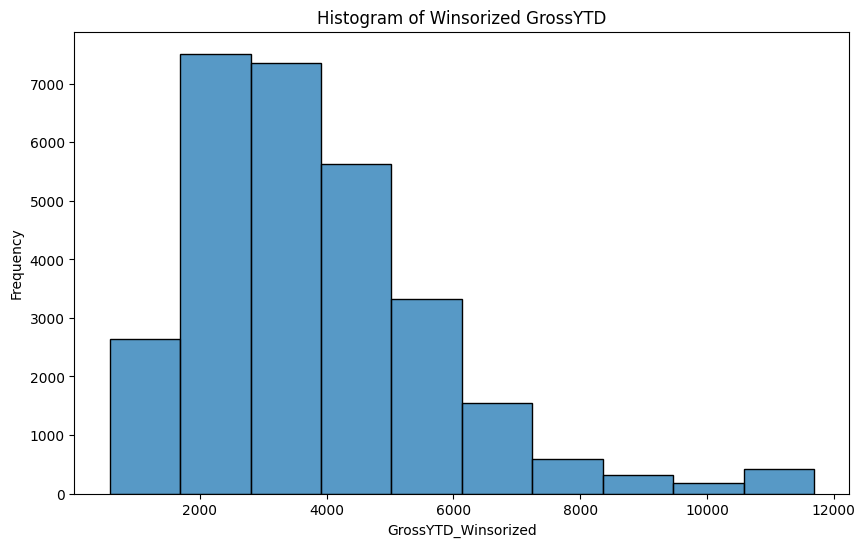

In [27]:
   # Apply Winsorizing and plot for selected columns
for col in ['AnnualSalary', 'GrossPayLastPaycheck', 'GrossYTD']:
    winsorize_and_plot(df, col)

# Log Transformation

In [28]:
print(df.head())

  LastName FirstName MiddleInitial                        Title  \
0      LUC   AUNDREA             S  WASTE ENFORCEMENT OFFICER 1   
1      LUE    KEISHA         RENEE   SHARED SERVICES SPECIALIST   
2      LUO       SEI             Y                    SECRETARY   
3      LYS   JACQUES             E    DTPW SERVICE SPECIALIST 2   
4      MAS      JOSE             R       RER PERMIT & PLANS REP   

                         DeptName  AnnualSalary  GrossPayLastPaycheck  \
0          SOLID WASTE MANAGEMENT     81592.186               9359.04   
1                 HUMAN RESOURCES     56423.161               2756.12   
2                          POLICE     40767.761               1640.86   
3   TRANSPORTATION & PUBLIC WORKS     87534.450               3410.16   
4  REGULATORY & ECONOMIC RESOURCE     59237.468               2321.84   

   GrossYTD  ObjectId  AnnualSalary_Winsorized  \
0   9359.04         1                81592.186   
1   2756.12         2                56423.161   
2   1640

In [29]:
def plot_data(df, column, title_suffix, column_suffix=None):
    """
    Plot boxplot and histogram for a given column in DataFrame.

    Parameters:
    - df: DataFrame containing the data
    - column: Name of the column to plot
    - title_suffix: Suffix for the title (e.g., 'Original', 'Log Transformed')
    - column_suffix: Suffix to append to column name if needed (e.g., '_Log')
    """
    col_name = f"{column}{column_suffix}" if column_suffix else column

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col_name])
    plt.title(f'Box Plot of {title_suffix} {column}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df[col_name], bins=10, kde=False)
    plt.title(f'Histogram of {title_suffix} {column}')
    plt.xlabel(f'{col_name}')
    plt.ylabel('Frequency')
    plt.show()


Summary Statistics for Original AnnualSalary:
count     29511.000000
mean      79674.874016
std       32801.061562
min        2340.000000
25%       54482.461500
50%       74885.692000
75%      102446.091000
max      177052.542000
Name: AnnualSalary, dtype: float64


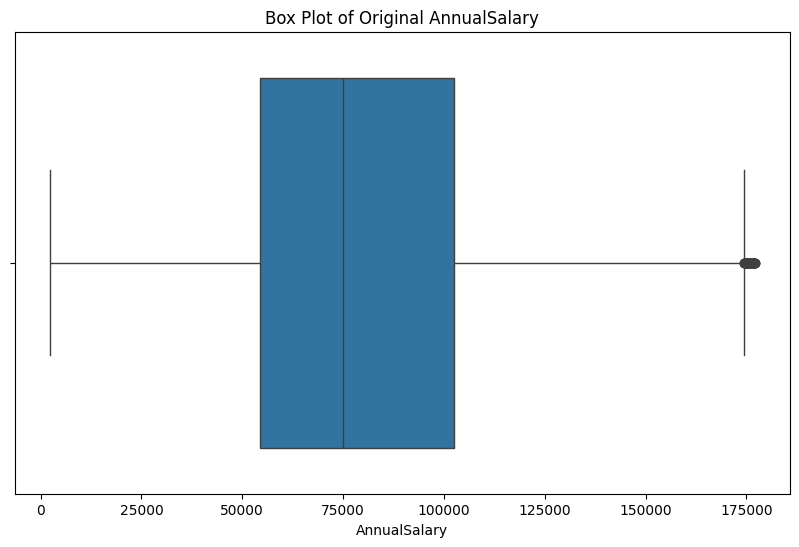

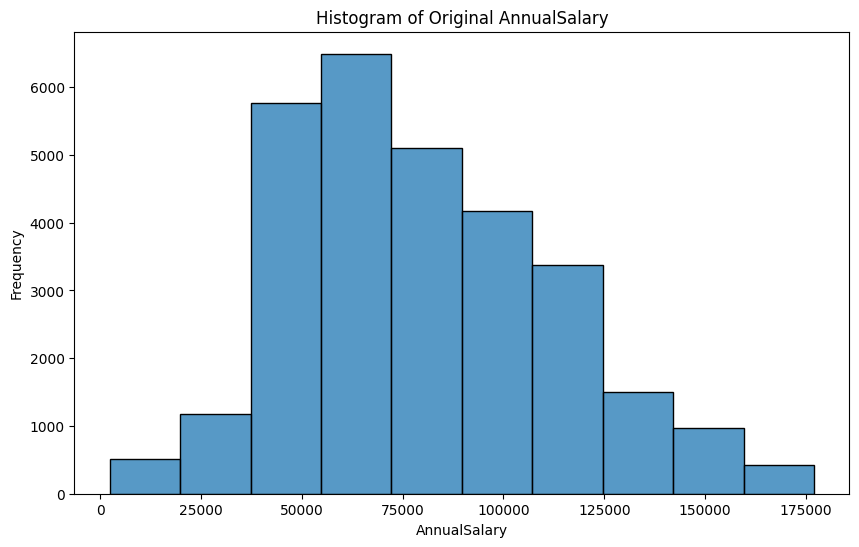


Summary Statistics for Original GrossPayLastPaycheck:
count    29511.000000
mean      3759.369628
std       2140.657662
min          0.010000
25%       2385.670000
50%       3439.890000
75%       4735.490000
max      77566.740000
Name: GrossPayLastPaycheck, dtype: float64


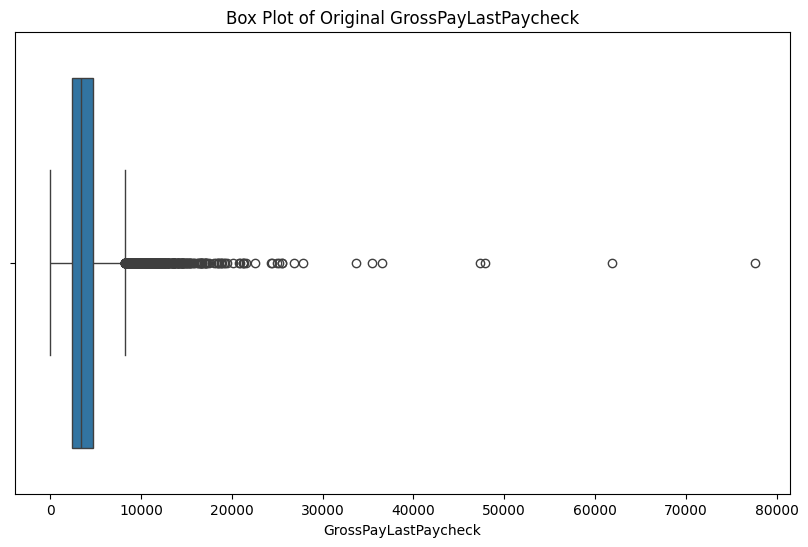

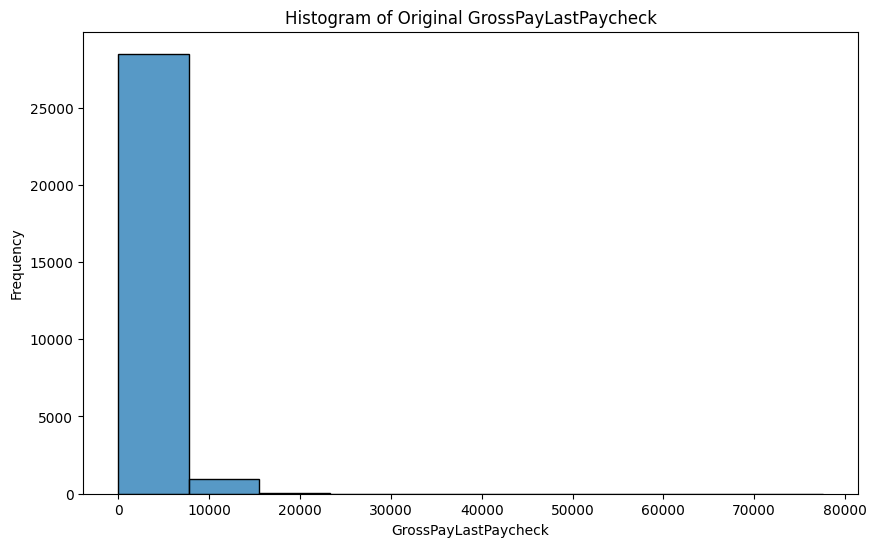


Summary Statistics for Original GrossYTD:
count     29511.000000
mean       3885.567743
std        2957.388059
min           0.010000
25%        2422.140000
50%        3486.320000
75%        4780.730000
max      159571.930000
Name: GrossYTD, dtype: float64


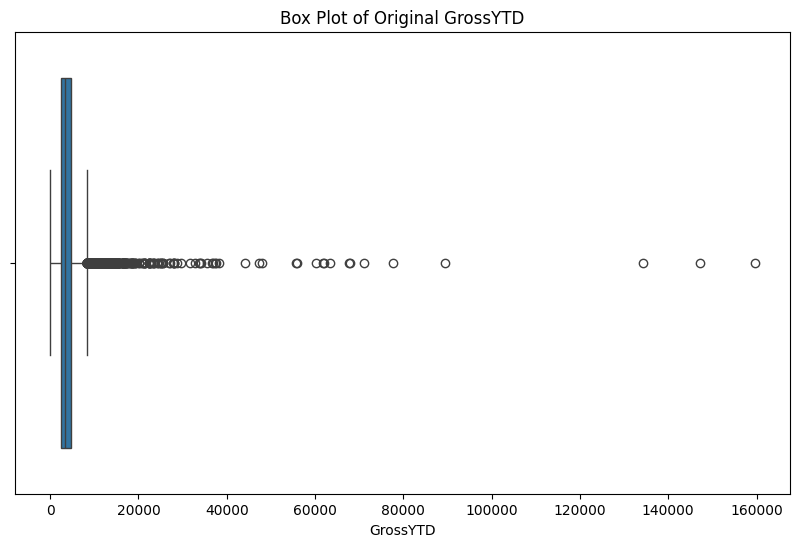

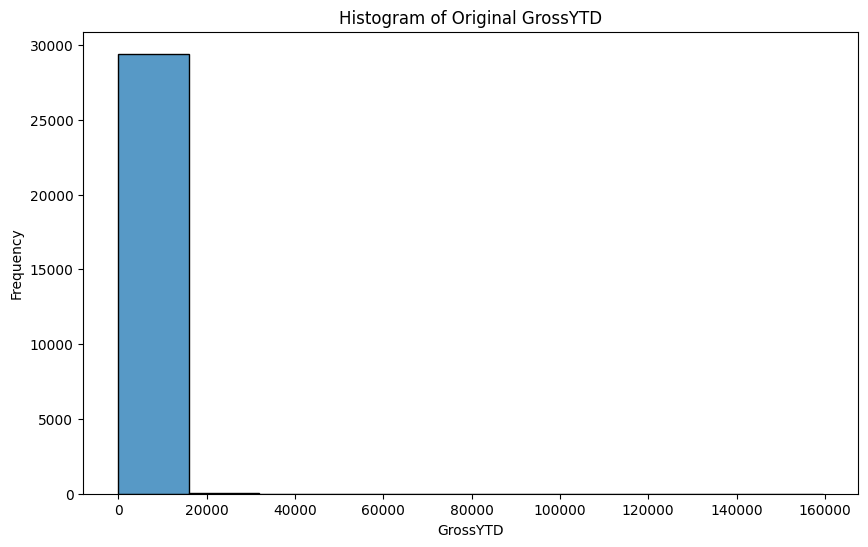

In [30]:
for col in ['AnnualSalary', 'GrossPayLastPaycheck', 'GrossYTD']:
    print(f"\nSummary Statistics for Original {col}:")
    print(df[col].describe())
    plot_data(df, col, title_suffix="Original")


In [31]:
def log_transform_and_plot(df, column):
    """
    Apply log transformation to a column and plot the results.

    Parameters:
    - df: DataFrame containing the data
    - column: Name of the column to log transform
    """
    try:
        if (df[column] <= 0).any():
            print(f"Warning: '{column}' contains non-positive values. Using log1p for transformation.")

        # Log transformation
        df[f"{column}_Log"] = np.log1p(df[column])

        print(f"\nSummary Statistics After Log Transformation of {column}:")
        print(df[f"{column}_Log"].describe())
        print(f"\nFirst Few Rows of Log Transformed {column}:")
        print(df[[column, f"{column}_Log"]].head())

        plot_data(df, column, title_suffix="Log Transformed", column_suffix="_Log")
    except KeyError:
        print(f"Error: Column '{column}' not found in DataFrame")
    except Exception as e:
        print(f"An error occurred during log transformation of {column}: {str(e)}")


Summary Statistics After Log Transformation of AnnualSalary:
count    29511.000000
mean        11.188599
std          0.471024
min          7.758333
25%         10.905652
50%         11.223731
75%         11.537102
max         12.084207
Name: AnnualSalary_Log, dtype: float64

First Few Rows of Log Transformed AnnualSalary:
   AnnualSalary  AnnualSalary_Log
0     81592.186         11.309501
1     56423.161         10.940653
2     40767.761         10.615671
3     87534.450         11.379799
4     59237.468         10.989326


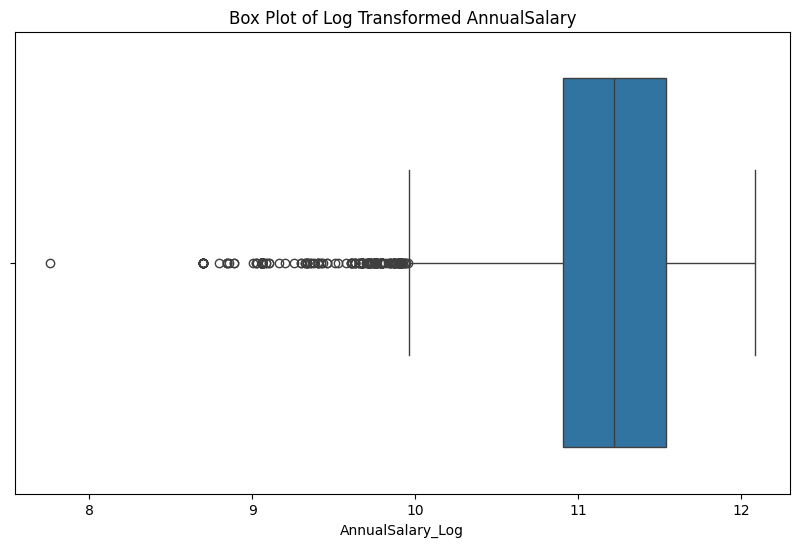

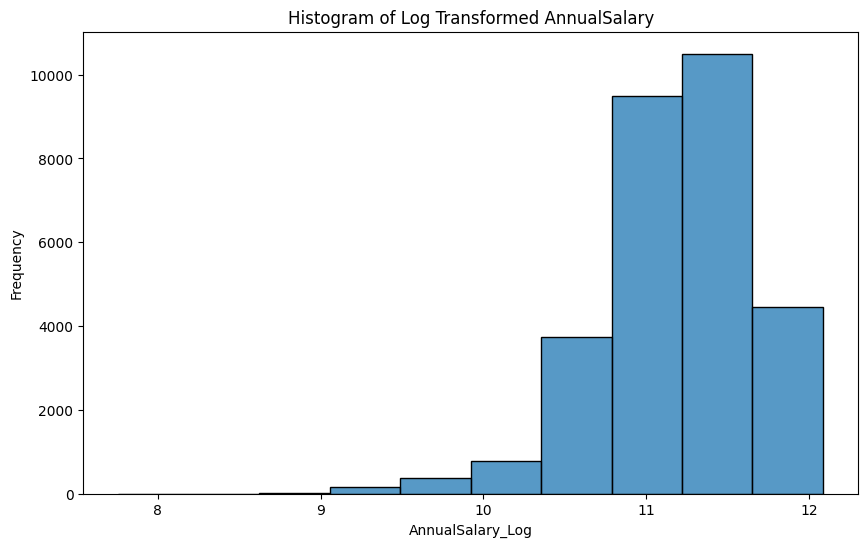


Summary Statistics After Log Transformation of GrossPayLastPaycheck:
count    29511.000000
mean         8.078777
std          0.614977
min          0.009950
25%          7.777654
50%          8.143485
75%          8.463052
max         11.258907
Name: GrossPayLastPaycheck_Log, dtype: float64

First Few Rows of Log Transformed GrossPayLastPaycheck:
   GrossPayLastPaycheck  GrossPayLastPaycheck_Log
0               9359.04                  9.144205
1               2756.12                  7.921942
2               1640.86                  7.403585
3               3410.16                  8.134808
4               2321.84                  7.750546


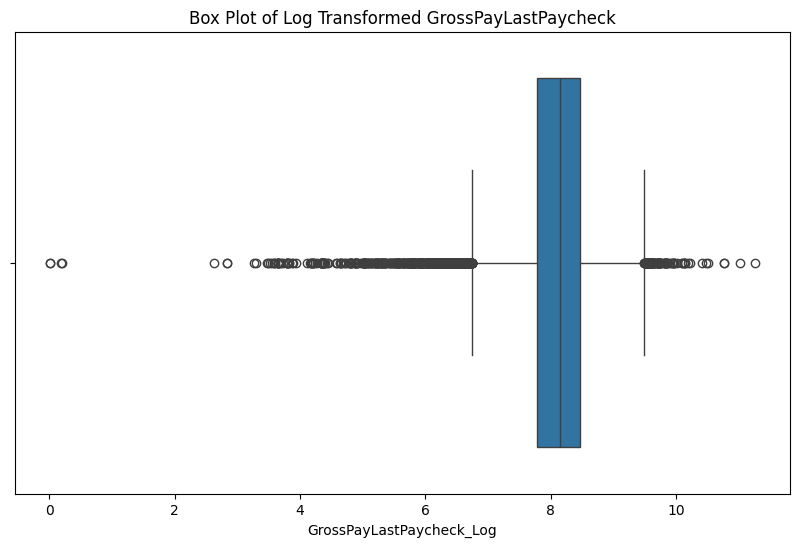

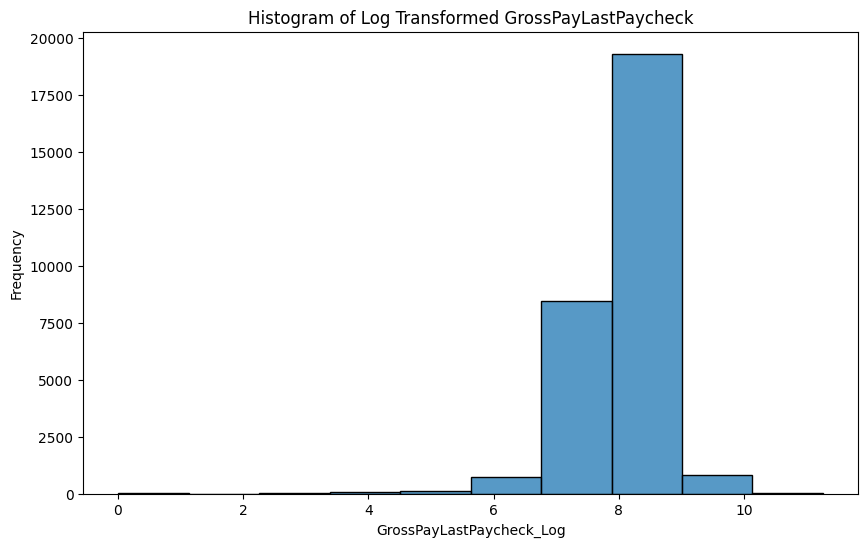


Summary Statistics After Log Transformation of GrossYTD:
count    29511.000000
mean         8.106403
std          0.596535
min          0.009950
25%          7.792819
50%          8.156889
75%          8.472558
max         11.980256
Name: GrossYTD_Log, dtype: float64

First Few Rows of Log Transformed GrossYTD:
   GrossYTD  GrossYTD_Log
0   9359.04      9.144205
1   2756.12      7.921942
2   1640.86      7.403585
3   3410.16      8.134808
4   2321.84      7.750546


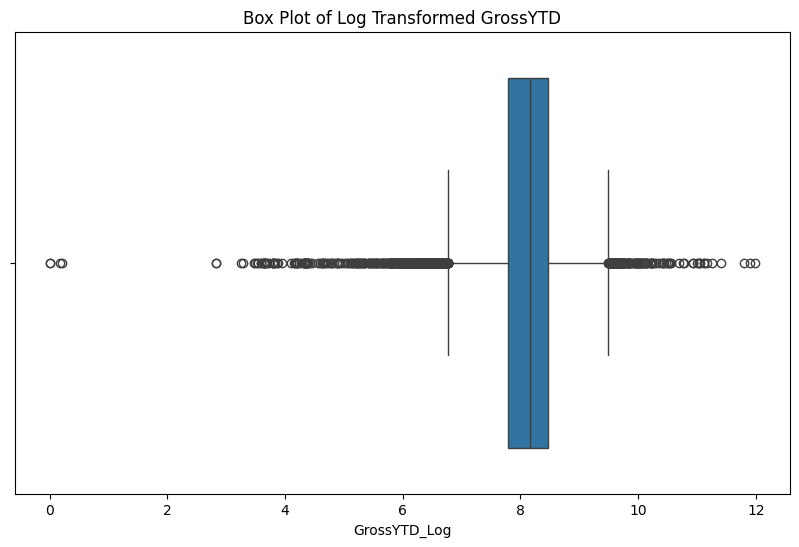

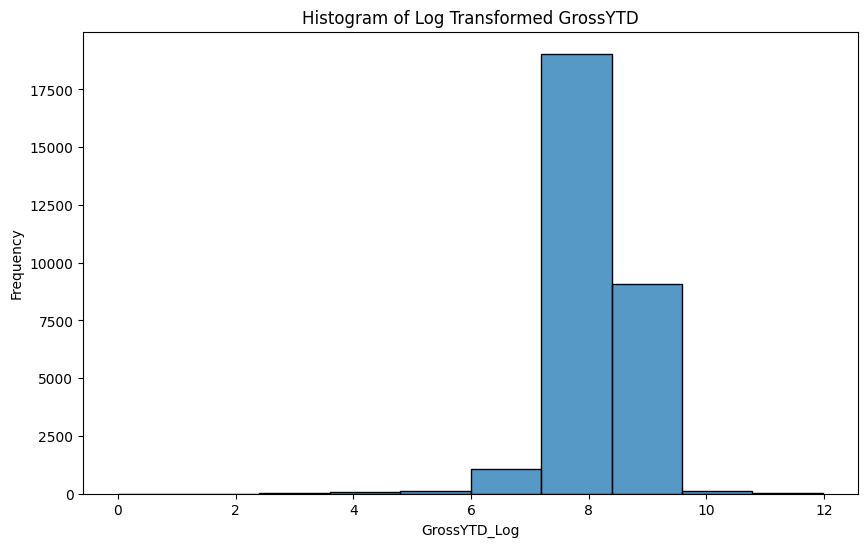

In [32]:
# Apply log transformation and plot for selected columns
for col in ['AnnualSalary', 'GrossPayLastPaycheck', 'GrossYTD']:
    log_transform_and_plot(df, col)

# Data Quality Report (DQR)


Summary Statistics for Original AnnualSalary:
count     29511.000000
mean      79674.874016
std       32801.061562
min        2340.000000
25%       54482.461500
50%       74885.692000
75%      102446.091000
max      177052.542000
Name: AnnualSalary, dtype: float64


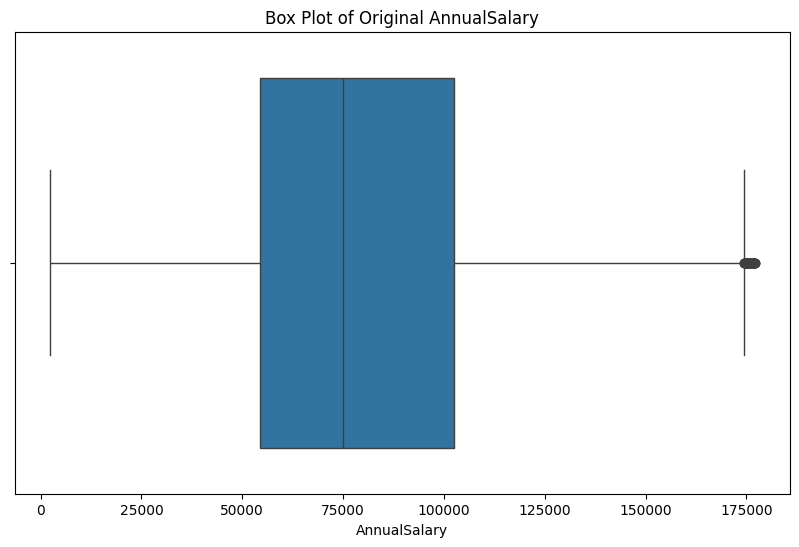

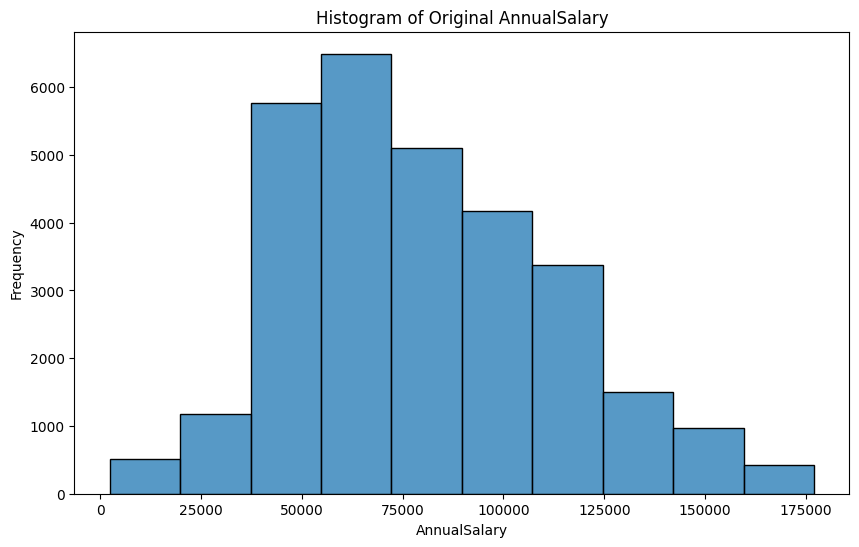


Summary Statistics for Original GrossPayLastPaycheck:
count    29511.000000
mean      3759.369628
std       2140.657662
min          0.010000
25%       2385.670000
50%       3439.890000
75%       4735.490000
max      77566.740000
Name: GrossPayLastPaycheck, dtype: float64


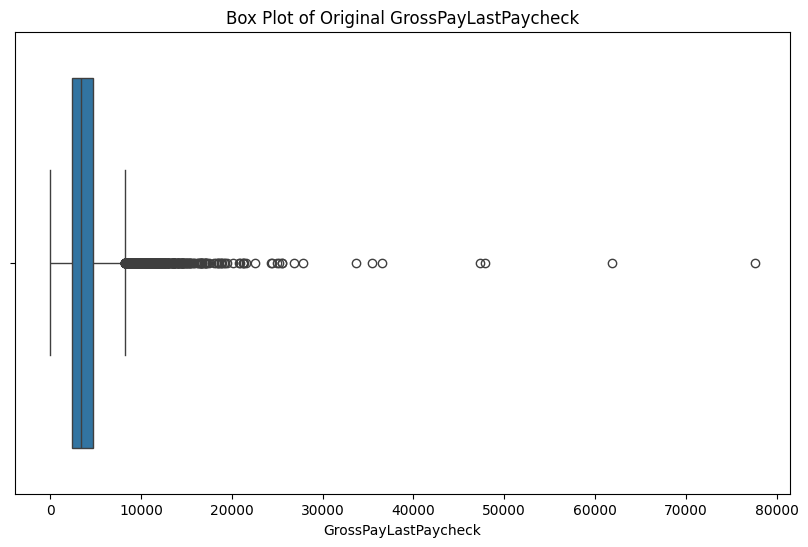

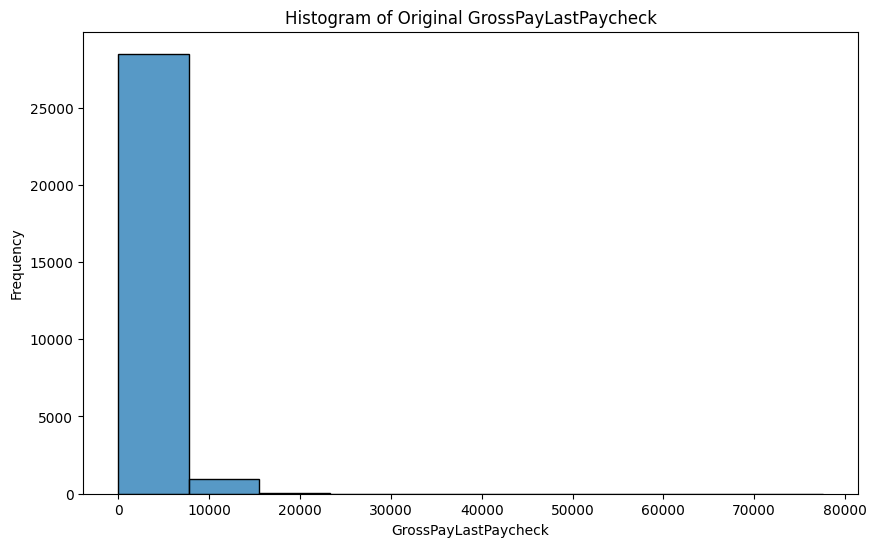


Summary Statistics for Original GrossYTD:
count     29511.000000
mean       3885.567743
std        2957.388059
min           0.010000
25%        2422.140000
50%        3486.320000
75%        4780.730000
max      159571.930000
Name: GrossYTD, dtype: float64


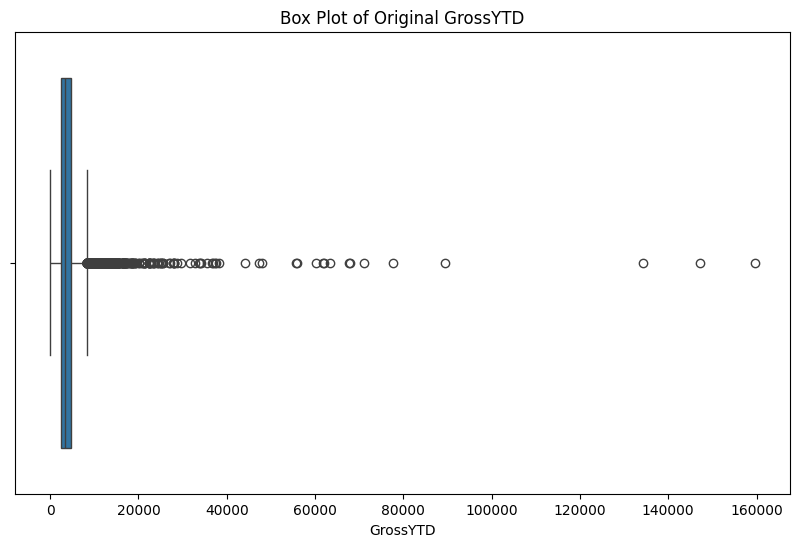

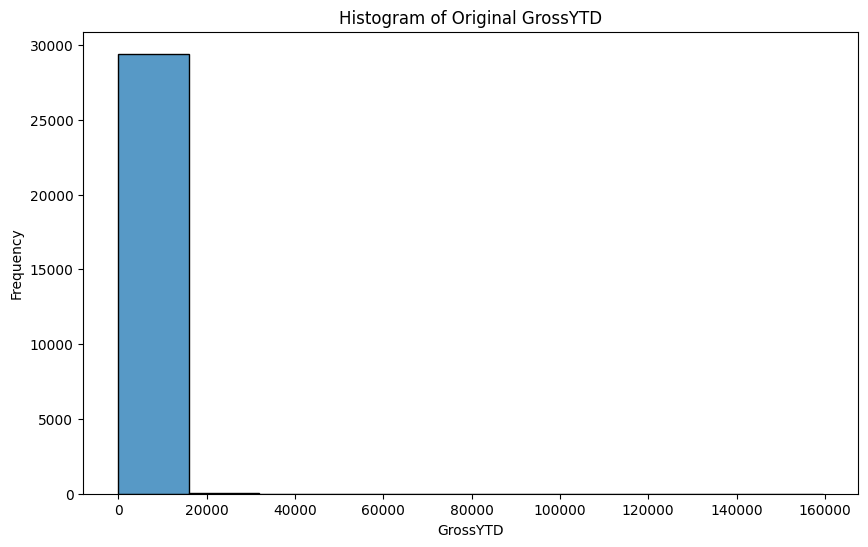


Summary Statistics After Log Transformation of AnnualSalary:
count    29511.000000
mean        11.188599
std          0.471024
min          7.758333
25%         10.905652
50%         11.223731
75%         11.537102
max         12.084207
Name: AnnualSalary_Log, dtype: float64

First Few Rows of Log Transformed AnnualSalary:
   AnnualSalary  AnnualSalary_Log
0     81592.186         11.309501
1     56423.161         10.940653
2     40767.761         10.615671
3     87534.450         11.379799
4     59237.468         10.989326


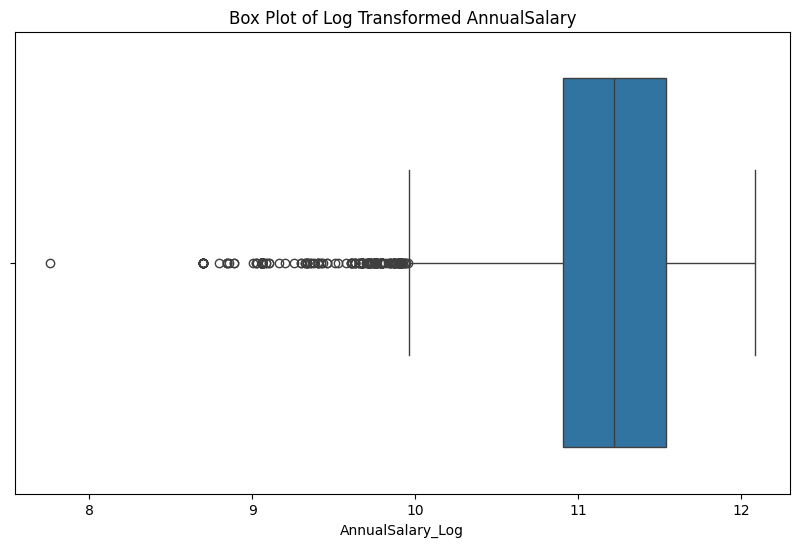

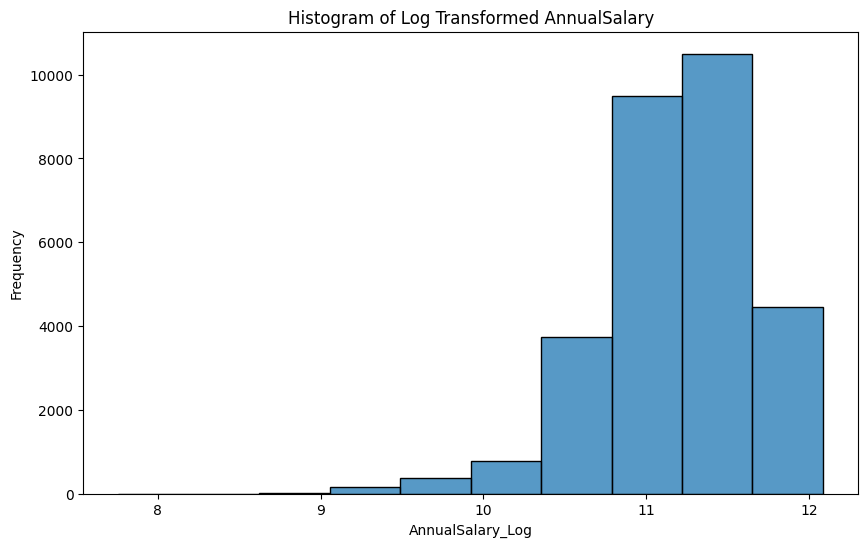


Summary Statistics After Log Transformation of GrossPayLastPaycheck:
count    29511.000000
mean         8.078777
std          0.614977
min          0.009950
25%          7.777654
50%          8.143485
75%          8.463052
max         11.258907
Name: GrossPayLastPaycheck_Log, dtype: float64

First Few Rows of Log Transformed GrossPayLastPaycheck:
   GrossPayLastPaycheck  GrossPayLastPaycheck_Log
0               9359.04                  9.144205
1               2756.12                  7.921942
2               1640.86                  7.403585
3               3410.16                  8.134808
4               2321.84                  7.750546


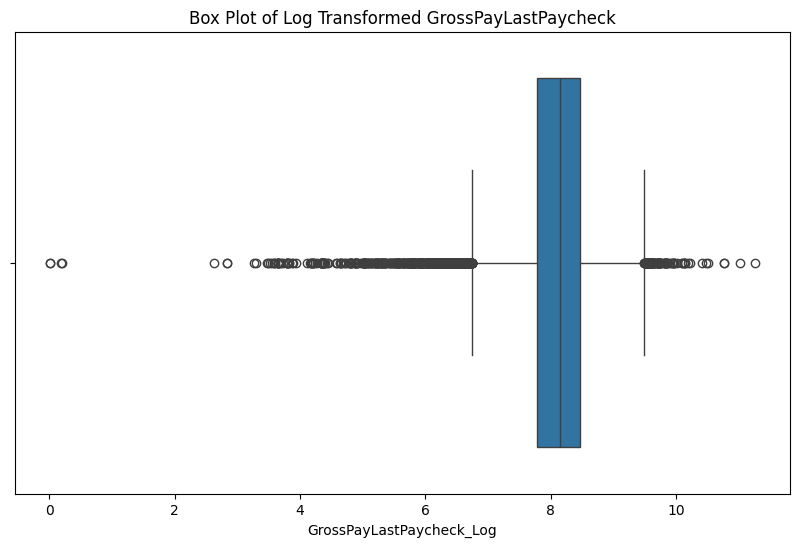

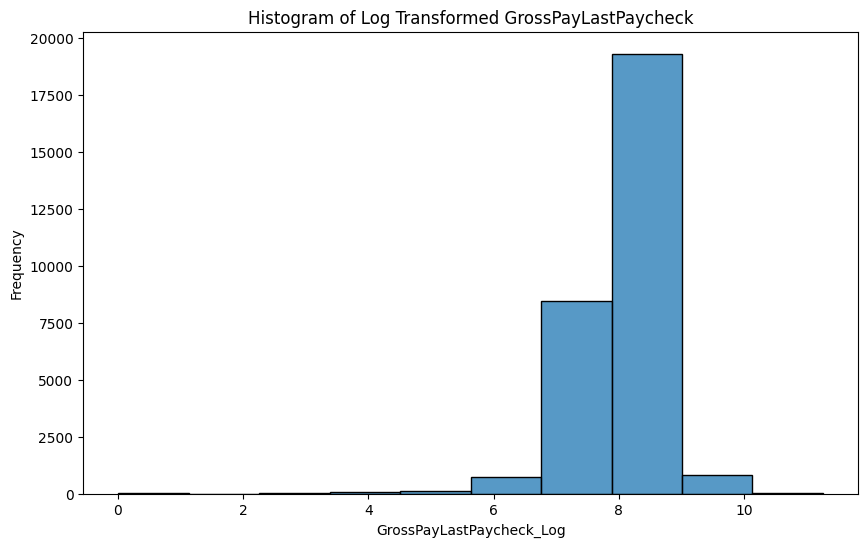


Summary Statistics After Log Transformation of GrossYTD:
count    29511.000000
mean         8.106403
std          0.596535
min          0.009950
25%          7.792819
50%          8.156889
75%          8.472558
max         11.980256
Name: GrossYTD_Log, dtype: float64

First Few Rows of Log Transformed GrossYTD:
   GrossYTD  GrossYTD_Log
0   9359.04      9.144205
1   2756.12      7.921942
2   1640.86      7.403585
3   3410.16      8.134808
4   2321.84      7.750546


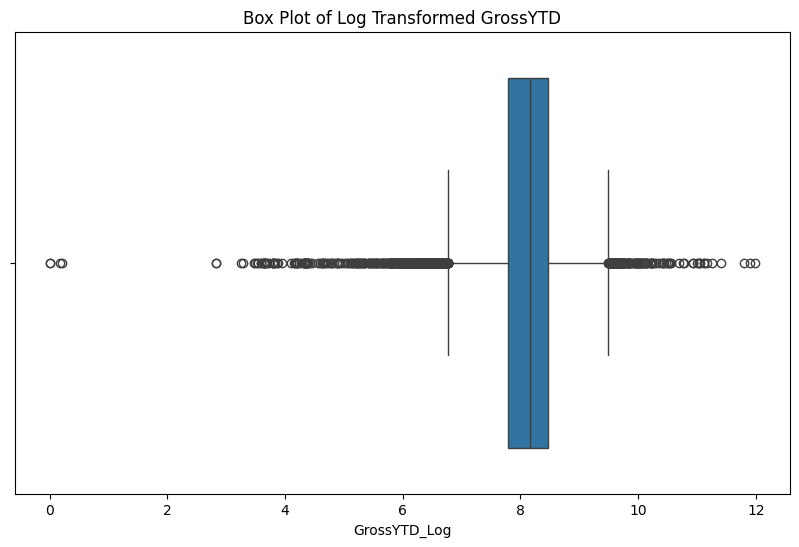

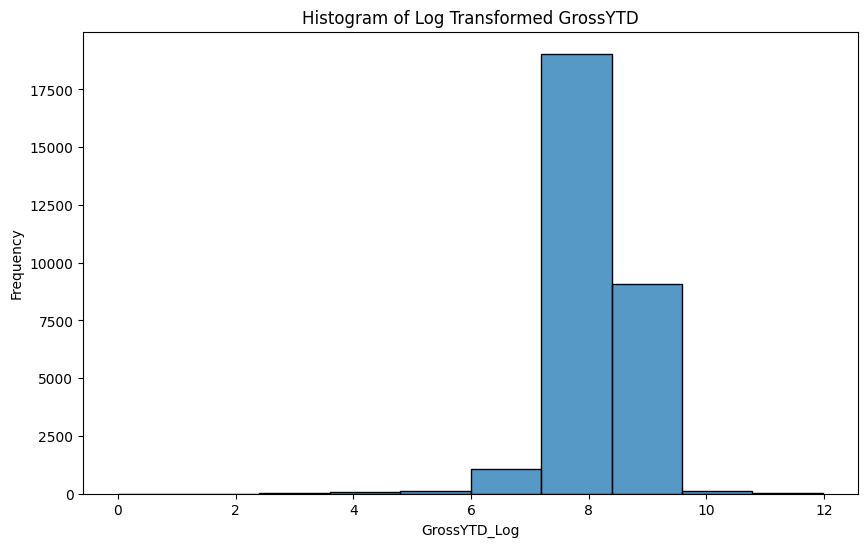

In [33]:
def plot_data(df, column, title_suffix, column_suffix=None):
    """
    Plot boxplot and histogram for a given column in DataFrame.

    Parameters:
    - df: DataFrame containing the data
    - column: Name of the column to plot
    - title_suffix: Suffix for the title (e.g., 'Original', 'Log Transformed')
    - column_suffix: Suffix to append to column name if needed (e.g., '_Log')
    """
    col_name = f"{column}{column_suffix}" if column_suffix else column

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col_name])
    plt.title(f'Box Plot of {title_suffix} {column}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df[col_name], bins=10, kde=False)
    plt.title(f'Histogram of {title_suffix} {column}')
    plt.xlabel(f'{col_name}')
    plt.ylabel('Frequency')
    plt.show()

# Plot for original data
for col in ['AnnualSalary', 'GrossPayLastPaycheck', 'GrossYTD']:
    print(f"\nSummary Statistics for Original {col}:")
    print(df[col].describe())
    plot_data(df, col, title_suffix="Original")

def log_transform_and_plot(df, column):
    """
    Apply log transformation to a column and plot the results.

    Parameters:
    - df: DataFrame containing the data
    - column: Name of the column to log transform
    """
    try:
        if (df[column] <= 0).any():
            print(f"Warning: '{column}' contains non-positive values. Using log1p for transformation.")

        # Log transformation
        df[f"{column}_Log"] = np.log1p(df[column])

        print(f"\nSummary Statistics After Log Transformation of {column}:")
        print(df[f"{column}_Log"].describe())
        print(f"\nFirst Few Rows of Log Transformed {column}:")
        print(df[[column, f"{column}_Log"]].head())

        plot_data(df, column, title_suffix="Log Transformed", column_suffix="_Log")
    except KeyError:
        print(f"Error: Column '{column}' not found in DataFrame")
    except Exception as e:
        print(f"An error occurred during log transformation of {column}: {str(e)}")

# Apply log transformation and plot for selected columns
for col in ['AnnualSalary', 'GrossPayLastPaycheck', 'GrossYTD']:
    log_transform_and_plot(df, col)


# Data Quality Report (DQR)

In [34]:
def generate_dqr1(df):
    # Initialize an empty DataFrame to store DQR1 results
    dqr1_df = pd.DataFrame(index=df.columns)

    # Basic Column Statistics
    dqr1_df['Missing_Values'] = df.isnull().sum()
    dqr1_df['Unique_Values'] = df.nunique()
    dqr1_df['Sample_Count'] = df.count()
    dqr1_df['Missing_Percentage'] = (dqr1_df['Missing_Values'] / len(df)) * 100

    # Sample Value Counts (stored as a list to avoid multiple columns issue)
    # Convert the result to a string to store it in a single column
    dqr1_df['Sample_Value_Counts'] = df.apply(lambda x: str(dict(x.value_counts().head(3))))

    # Separate numeric and non-numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    non_numeric_df = df.select_dtypes(exclude=[np.number])

    # Descriptive Statistics for Numeric Columns Only
    descriptive_stats = numeric_df.describe().T
    stats_columns = ['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurt']
    for col in stats_columns:
        dqr1_df[col] = descriptive_stats[col] if col in descriptive_stats else 'N/A'

    # Convert stats columns to object type for safe assignment
    dqr1_df[stats_columns] = dqr1_df[stats_columns].astype(object)

    # Mark irrelevant stats for non-numeric columns
    dqr1_df.loc[non_numeric_df.columns, stats_columns] = 'N/A'

    # Correlation Analysis for Numeric Columns Only
    if len(numeric_df.columns) > 1:
        corr_matrix = numeric_df.corr().abs()
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        highly_correlated = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
        dqr1_df['Highly_Correlated'] = dqr1_df.index.isin(highly_correlated)
    else:
        dqr1_df['Highly_Correlated'] = 'N/A'

    # Variance Analysis for Numeric Columns Only
    variances = numeric_df.var()
    dqr1_df['High_Variance'] = dqr1_df.index.map(lambda x: variances[x] > 1.0 if x in variances else 'N/A')
    dqr1_df['Low_Variance'] = dqr1_df.index.map(lambda x: variances[x] < 0.01 if x in variances else 'N/A')

    # Potential Index Columns
    dqr1_df['Potential_Index'] = dqr1_df['Unique_Values'] == len(df)

    # Additional Column Type Info
    dqr1_df['Data_Type'] = df.dtypes.astype(str)

    # Flag Columns for High Dimensionality
    high_dim_threshold = 200  # Fixed threshold of 200
    dqr1_df['High_Dimensionality_Risk'] = dqr1_df.apply(
        lambda row: row['Data_Type'] == 'object' and row['Unique_Values'] > high_dim_threshold, axis=1
    )

    return dqr1_df

In [35]:
dqr1_df = generate_dqr1(df)

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [36]:
print(dqr1_df.head())

               Missing_Values  Unique_Values  Sample_Count  \
LastName                    0          11438         29511   
FirstName                   0           8095         29511   
MiddleInitial           10376           1294         19135   
Title                       0           2457         29511   
DeptName                    0             44         29511   

               Missing_Percentage  \
LastName                 0.000000   
FirstName                0.000000   
MiddleInitial           35.159771   
Title                    0.000000   
DeptName                 0.000000   

                                             Sample_Value_Counts mean  std  \
LastName       {'RODRIGUEZ': 425, 'GONZALEZ': 379, 'GARCIA': ...  N/A  N/A   
FirstName           {'JOSE': 392, 'MICHAEL': 312, 'CARLOS': 300}  N/A  N/A   
MiddleInitial                  {'A': 2653, 'M': 1772, 'L': 1722}  N/A  N/A   
Title          {'POLICE OFFICER': 2315, 'CORRECTIONAL OFFICER...  N/A  N/A   
DeptName      

#Analyzing the Data Quality Report

##Strengths:
Comprehensive Checks: The code performs a wide range of checks including missing values, outliers, scaling, encoding, high dimensionality, low variance, and correlations. It provides custom severity levels and actionable recommendations.
Clear Reporting: Uses flags like 'Treat_Flag', 'Outliers' to quickly identify issues, with sorting by severity for prioritization. Recommendations are practical.
Customizable Output: Allows column reordering and uses pd.set_option for detailed formatting, enhancing readability.
Logical Flow: Modular structure for each check enhances maintainability and extensibility.

##Potential Improvements:
Scalability: Nested loops might slow down for large datasets; consider using vectorized operations or pandas filtering.
Error Handling: Add checks to ensure dqr1_df has all required columns before operations, and handle cases where data might not be numeric or statistical measures are missing.
Flexibility for User-Defined Metrics: Allow customization of thresholds for missing values, outliers, and variance.
Correlation Analysis: Ensure Highly_Correlated is computed or computed dynamically.
Visualization: Incorporating visualizations like histograms for outliers or heatmaps for correlations could improve understanding.
Documentation: Add a docstring or comments explaining dqr1_df structure and df format.
Reusability: Manage global changes from pd.set_option to avoid affecting other code, perhaps by using context managers or resetting at the end.

# Action Plan: Data Quality Treatment and Recommendations

Based on the data quality analysis provided and the screenshot of the action plan, here's a tailored Data Cleaning and Transformation Plan for your dataset:

1. **Remove Duplicates**

Objective: Ensure each data point is unique, reducing redundancy and preventing skewed analysis results.

**Action**:

python
df.drop_duplicates(inplace=True)

2. **Handle Missing Values**

Objective: Prevent disruptions in transformations, model training, and ensure accurate statistical analysis.

**Action**:

For columns with over 50% missing values, consider removal:
python
high_missing_cols = dqr1_df[dqr1_df['Missing_Percentage'] > 50].index
df.drop(columns=high_missing_cols, inplace=True)
For columns with less than 50% missing values, apply simple imputation:
Numeric Columns: Use mean or median.
python
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)
Categorical Columns: Use mode.
python
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

3. **Convert Incorrect Data Types**

Objective: Ensure data types are correct for transformations, encoding, and scaling to avoid misinterpretation.

**Action**:

Convert numeric data stored as text to numeric:
python
df['ColumnName'] = pd.to_numeric(df['ColumnName'], errors='coerce')
Convert date-time data to datetime:
python
df['DateColumn'] = pd.to_datetime(df['DateColumn'])
Convert low cardinality categorical columns to category:
python
low_cardinality_cols = [col for col in df.columns if df[col].nunique() < 10]
df[low_cardinality_cols] = df[low_cardinality_cols].astype('category')

4. **Address High Cardinality and Encoding**

Objective: Reduce dimensionality and prepare categorical data for analysis and modeling.

**Action**:
For columns like 'LastName', 'FirstName', 'MiddleInitial', which are flagged as high dimensionality:
Consider using OrdinalEncoder for ordered categories or OneHotEncoder for nominal categories if dimensionality is manageable, or feature hashing for very high cardinality.
python
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

For Ordinal Encoding

encoder = OrdinalEncoder()
df[['LastName', 'FirstName']] = encoder.fit_transform(df[['LastName', 'FirstName']])

For One-Hot Encoding (if manageable)

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(df[['LastName']])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names(['LastName']))
df = pd.concat([df, encoded_df], axis=1)
df.drop('LastName', axis=1, inplace=True)

5. **Outliers**

Objective: Implement transformations or remove outliers based on their impact.

**Action**:
For 'AnnualSalary', apply log transformation as already done, and consider capping or flooring if necessary:

python
df['AnnualSalary_Log'] = np.log1p(df['AnnualSalary'])
cap_value = df['AnnualSalary_Log'].quantile(0.99)
df['AnnualSalary_Log'] = df['AnnualSalary_Log'].clip(upper=cap_value)

6. **Standardization/Normalization&&

Objective: Scale numeric variables with large range discrepancies.

**Action**:
Use StandardScaler for 'AnnualSalary_Log' and other numeric columns if needed:
python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['AnnualSalary_Log']] = scaler.fit_transform(df[['AnnualSalary_Log']])

7. **Column Removal**

Objective: Remove irrelevant or low-information columns.

**Action**:
Drop columns with low variance or those identified as not contributing much information:
python
low_variance_cols = dqr1_df[dqr1_df['Low_Variance'] == True].index
df.drop(columns=low_variance_cols, inplace=True)

#Implement the Action Plan

In [42]:
# 1. Remove Duplicates
df.drop_duplicates(inplace=True)

In [43]:
# 2. Handle Missing Values
# Drop columns with high missing values
high_missing_cols = ['Subricom']  # Removed 'FileDate' from this list
df.drop(columns=high_missing_cols, errors='ignore', inplace=True)

if 'FileDate' in df.columns:
    df['FileDate'].fillna(df['FileDate'].mean(), inplace=True)


In [44]:
# 3. Convert Incorrect Data Types
# Convert numeric and datetime columns
numeric_cols = ['VicAge', 'OffAge', 'VicCount', 'OffCount', 'Incident']
# Check if the columns exist before converting them
numeric_cols = [col for col in numeric_cols if col in df.columns]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

date_cols = ['FileDate'] if 'FileDate' in df.columns else []
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')



In [46]:
# 4. Treat High Cardinality and Encoding
high_cardinality_cols = ['OffWeap', 'OffR1', 'Agency']  # Example from the template; adjust based on your data
low_cardinality_cols = ['Solved', 'Month', 'AgencyType']  # Low cardinality; get dummies

# Check if columns exist in DataFrame before proceeding
high_cardinality_cols = [col for col in high_cardinality_cols if col in df.columns]
low_cardinality_cols = [col for col in low_cardinality_cols if col in df.columns]

# Ordinal Encoding for high cardinality columns
if len(high_cardinality_cols) > 0:
    encoder = OrdinalEncoder()
    df[high_cardinality_cols] = encoder.fit_transform(df[high_cardinality_cols])

# One-hot Encoding for low cardinality columns
if len(low_cardinality_cols) > 0:
    df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)



In [48]:
# 5. Outlier Detection and Treatment
outlier_cols = ['VicCount', 'OffCount']
outlier_cols = [col for col in outlier_cols if col in df.columns] # Check if columns exist

for col in outlier_cols:
    if col in df.columns:  # Only process if the column exists
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)



In [50]:
# 6. Scaling for High Range Columns
scaling_cols = ['Incident']
# Check if 'Incident' column exists before scaling
if 'Incident' in df.columns:
    scaler = StandardScaler()
    df[['Incident']] = scaler.fit_transform(df[['Incident']])
else:
    print("Warning: 'Incident' column not found for scaling.")


In [51]:
# 7. Remove Low-Variance Columns
low_variance_cols = ['VicCount']  # Example from the template; adjust based on your analysis
df.drop(columns=low_variance_cols, errors='ignore', inplace=True)


In [52]:
# 8. Remove Highly Correlated Columns
highly_correlated_cols = ['OffCount']  # Example from the template; adjust based on your analysis
df.drop(columns=highly_correlated_cols, errors='ignore', inplace=True)


In [53]:
# 9. Identify Potential Index Columns
if 'ID' in df.columns:
    df.set_index('ID', inplace=True)

# Display Checks
print("\nShape after final processing:", df.shape)
print("\nDataFrame Information:")
print(df.info())


Shape after final processing: (29511, 15)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 29511 entries, 0 to 30079
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LastName                         29511 non-null  object 
 1   FirstName                        29511 non-null  object 
 2   MiddleInitial                    19135 non-null  object 
 3   Title                            29511 non-null  object 
 4   DeptName                         29511 non-null  object 
 5   AnnualSalary                     29511 non-null  float64
 6   GrossPayLastPaycheck             29511 non-null  float64
 7   GrossYTD                         29511 non-null  float64
 8   ObjectId                         29511 non-null  int64  
 9   AnnualSalary_Winsorized          29511 non-null  float64
 10  GrossPayLastPaycheck_Winsorized  29511 non-null  float64
 11  GrossYTD_Winsorize

# Re-run the Data Quality Report

In [59]:
def generate_data_quality_report_analysis(dqr1_df, df):
    """
    Analyzes the Data Quality Report (DQR1) and provides an action plan.

    Parameters:
    - dqr1_df: DataFrame containing the DQR1 report.
    - df: Original DataFrame.

    Returns:
    - DataFrame containing the analysis and action plan.
    """

    # Initialize the analysis DataFrame
    analysis_df = pd.DataFrame(index=dqr1_df.index)
    analysis_df['Action'] = ''  # Start with an empty Action column

    # Iterate through each column in the DQR1 report
    for column in dqr1_df.index:
        # Basic checks and recommendations
        if dqr1_df.loc[column, 'Missing_Percentage'] > 50:
            analysis_df.loc[column, 'Action'] = 'Consider removing column due to high missing values.'
        elif dqr1_df.loc[column, 'Missing_Percentage'] > 0:
            analysis_df.loc[column, 'Action'] = 'Impute missing values (mean/median/mode).'
        if dqr1_df.loc[column, 'High_Dimensionality_Risk']:
            analysis_df.loc[column, 'Action'] += ' Address high dimensionality (encoding/feature hashing).'
        if dqr1_df.loc[column, 'Low_Variance'] == True:  # Assuming Low_Variance is a boolean column
            analysis_df.loc[column, 'Action'] += ' Consider removing column due to low variance.'
        if dqr1_df.loc[column, 'Highly_Correlated'] == True:  # Assuming Highly_Correlated is a boolean column
            analysis_df.loc[column, 'Action'] += ' Investigate and potentially remove due to high correlation.'

        # Add more specific checks and recommendations based on your domain knowledge and requirements here

    return analysis_df

In [60]:
print(analysis_df.head())


                                   Action
LastName       Further analysis required.
FirstName      Further analysis required.
MiddleInitial  Further analysis required.
Title          Further analysis required.
DeptName       Further analysis required.


In [61]:
print("\nDataFrame shape after final processing:", df.shape)
print("\nDataFrame Information:")
print(df.info())


DataFrame shape after final processing: (29511, 15)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 29511 entries, 0 to 30079
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LastName                         29511 non-null  object 
 1   FirstName                        29511 non-null  object 
 2   MiddleInitial                    19135 non-null  object 
 3   Title                            29511 non-null  object 
 4   DeptName                         29511 non-null  object 
 5   AnnualSalary                     29511 non-null  float64
 6   GrossPayLastPaycheck             29511 non-null  float64
 7   GrossYTD                         29511 non-null  float64
 8   ObjectId                         29511 non-null  int64  
 9   AnnualSalary_Winsorized          29511 non-null  float64
 10  GrossPayLastPaycheck_Winsorized  29511 non-null  float64
 11  GrossYTD

In [65]:
dqr1_df = generate_dqr1(df)
analysis_df = generate_data_quality_report_analysis(dqr1_df, df)


In [66]:
generate_dqr1(df)

,Missing_Values,Unique_Values,Sample_Count,Missing_Percentage,Sample_Value_Counts,mean,std,min,25%,50%,75%,max,skew,kurt,Highly_Correlated,High_Variance,Low_Variance,Potential_Index,Data_Type,High_Dimensionality_Risk
LastName,0,11438,29511,0.000000,"{'RODRIGUEZ': 425, 'GONZALEZ': 379, 'GARCIA': ...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,True
FirstName,0,8095,29511,0.000000,"{'JOSE': 392, 'MICHAEL': 312, 'CARLOS': 300}",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,True
MiddleInitial,10376,1294,19135,35.159771,"{'A': 2653, 'M': 1772, 'L': 1722}",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,True
Title,0,2457,29511,0.000000,"{'POLICE OFFICER': 2315, 'CORRECTIONAL OFFICER...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,True
DeptName,0,44,29511,0.000000,"{'POLICE': 4254, 'TRANSPORTATION & PUBLIC WORK...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
AnnualSalary,0,8128,29511,0.000000,"{71327.909: 307, 46810.4: 248, 49059.92: 247}",79674.874016,32801.061562,2340.0,54482.4615,74885.692,102446.091,177052.542,N/A,N/A,False,True,False,False,float64,False
GrossPayLastPaycheck,0,20335,29511,0.000000,"{922.98: 147, 2646.66: 132, 2422.14: 111}",3759.369628,2140.657662,0.01,2385.67,3439.89,4735.49,77566.74,N/A,N/A,False,True,False,False,float64,False
GrossYTD,0,20464,29511,0.000000,"{922.98: 145, 2646.66: 132, 2422.14: 111}",3885.567743,2957.388059,0.01,2422.14,3486.32,4780.73,159571.93,N/A,N/A,False,True,False,False,float64,False
ObjectId,0,29511,29511,0.000000,"{1: 1, 20077: 1, 20075: 1}",15053.848124,8678.529328,1.0,7554.5,15052.0,22569.5,30080.0,N/A,N/A,False,True,False,True,int64,False
AnnualSalary_Winsorized,0,7882,29511,0.000000,"{71327.909: 307, 16550.04: 297, 163847.378: 296}",79665.874077,32550.039437,16550.04,54482.4615,74885.692,102446.091,163847.378,N/A,N/A,True,True,False,False,float64,False


In [64]:
generate_data_quality_report_analysis(dqr1_df, df)

,Action
LastName,Address high dimensionality (encoding/feature...
FirstName,Address high dimensionality (encoding/feature...
MiddleInitial,Impute missing values (mean/median/mode). Addr...
Title,Address high dimensionality (encoding/feature...
DeptName,
AnnualSalary,
GrossPayLastPaycheck,
GrossYTD,
ObjectId,
AnnualSalary_Winsorized,Investigate and potentially remove due to hig...


In [67]:
# Install necessary libraries in Colab
!pip install catboost tensorflow-addons scikeras tqdm dask[dataframe] -qqq

# Import necessary packages
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 14.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [70]:
# Ensure binary 'Solved' column for classification (0 for unsolved, 1 for solved)
if 'Solved_Yes' in df.columns:
    df['Solved'] = df['Solved_Yes'].astype(int)
else:
    # Handle the case where 'Solved_Yes' is not present
    # For example, you might want to create a new 'Solved' column with default values
    # or raise an error to indicate the data is missing
    print("Warning: 'Solved_Yes' column not found in DataFrame.")
    # You could potentially create a new 'Solved' column based on other logic
    # or simply skip this step if 'Solved_Yes' is not required
    df['Solved'] = 0

# Define features and target variable
X = df.drop(columns=['Solved'])
y = df['Solved']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

In [73]:
X_train = np.concatenate([X_train_scaled, X_train.select_dtypes(include=['bool', 'object', 'category']).values], axis=1)
X_test = np.concatenate([X_test_scaled, X_test.select_dtypes(include=['bool', 'object', 'category']).values], axis=1)

In [74]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
catboost = cb.CatBoostClassifier(verbose=0, random_state=42)
lightgbm = lgb.LGBMClassifier(random_state=42)

In [75]:
def create_nn_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tensorflow_nn = KerasClassifier(model=create_nn_model, epochs=10, batch_size=32, verbose=0)

In [76]:
models = {
    'Logistic Regression': log_reg,
    'Random Forest': random_forest,
    'XGBoost': xgboost,
    'CatBoost': catboost,
    'LightGBM': lightgbm,
    'TensorFlow NN': tensorflow_nn
}

In [99]:
results = []
print("\nStarting model training and evaluation...\n")

for model_name, model in tqdm(models.items(), desc="Training models"):
    print(f"\nTraining {model_name}...")


Starting model training and evaluation...



Training models: 100%|██████████| 6/6 [00:00<00:00, 24793.92it/s]


Training Logistic Regression...

Training Random Forest...

Training XGBoost...

Training CatBoost...

Training LightGBM...

Training TensorFlow NN...


In [80]:
# Record start time
start_time = time.time()

In [108]:
try:
    model.fit(X_train, y_train)
except ValueError as e:
    if "Input contains NaN" in str(e):
        print(f"Error: {model_name} - Input contains NaN values. Imputation or data cleaning might be needed.")

        # Handle NaN values (e.g., impute with mean or median)
        X_train = np.nan_to_num(X_train)  # Replace NaN with 0 as an example

        # Retry fitting after handling NaN values
        try:
            model.fit(X_train, y_train)
        except Exception as retry_error:
            print(f"Error: {model_name} - Could not fit the model after handling NaN. Error: {retry_error}")
    else:
        # Handle other unexpected errors
        print(f"Error: {model_name} - An unexpected error occurred during fitting: {e}")

Error: TensorFlow NN - Input contains NaN values. Imputation or data cleaning might be needed.
Error: TensorFlow NN - Could not fit the model after handling NaN. Error: Input contains NaN


In [111]:
end_time = time.time()
training_time = end_time - start_time

In [114]:
# Predict and evaluate
try:
    y_pred = model.predict(X_test)

    # Ensure y_pred is in the correct format for evaluation metrics
    if model_name == 'TensorFlow NN':
        y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Append results including training time
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'AUC': auc,
        'Training Time (s)': training_time
    })

    print(f"{model_name} completed with AUC: {auc:.4f}, Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Training Time: {training_time:.2f} seconds")

except Exception as e:
    print(f"Error during evaluation for {model_name}: {e}")


Error during evaluation for TensorFlow NN: Estimator needs to be fit before `predict` can be called


In [119]:
# Display Model Performance
if results:  # Ensure results list is not empty
    results_df = pd.DataFrame(results).sort_values(by='AUC', ascending=False)
    print("\nModel performance summary:\n", results_df)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='AUC', data=results_df, palette="viridis")
    plt.title('Model Comparison Based on AUC Score')
    plt.xlabel('Model')
    plt.ylabel('AUC Score')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No results to display or plot.")


No results to display or plot.
